<a href="https://colab.research.google.com/github/moghanapriya-27/Datascience/blob/main/ex_5a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install nltk spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Import libraries
import pandas as pd
import nltk
import string
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Load the dataset assuming you've uploaded Reviews.csv manually in /content/
df = pd.read_csv('/content/Reviews.csv', engine='python', quotechar='"', on_bad_lines='skip')

print(f"Dataset loaded. Number of entries: {len(df)}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Dataset loaded. Number of entries: 441513


In [3]:
# Select review text column and clean data
reviews = df['Text'].dropna().head(10000).reset_index(drop=True)
print(f"Number of reviews selected: {len(reviews)}")

# Preprocessing function: lowercase + remove punctuation
def preprocess_text(text):
    text = text.lower()
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply preprocessing
reviews = reviews.apply(preprocess_text)

# Check a sample review after preprocessing
print(reviews[0])


Number of reviews selected: 10000
i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than  most


In [8]:
import spacy
import pandas as pd
import string

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Assuming `reviews` is your preprocessed pandas Series of review texts

def spacy_process(text):
    doc = nlp(text)
    # Tokens: keep alphabetic, non-stopwords
    tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]
    # POS tags as (token, pos)
    pos_tags = [(token.text, token.pos_) for token in doc if token.is_alpha and not token.is_stop]
    # Named entities as (entity_text, label)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return tokens, pos_tags, entities

# Apply spaCy pipeline to all reviews
results = reviews.apply(spacy_process)

# Example outputs from first review
tokens, pos_tags, entities = results.iloc[0]
print("Tokens:", tokens[:20])
print("POS Tags:", pos_tags[:20])
print("Named Entities:", entities)


Tokens: ['bought', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates']
POS Tags: [('bought', 'VERB'), ('vitality', 'NOUN'), ('canned', 'VERB'), ('dog', 'NOUN'), ('food', 'NOUN'), ('products', 'NOUN'), ('found', 'VERB'), ('good', 'ADJ'), ('quality', 'NOUN'), ('product', 'NOUN'), ('looks', 'VERB'), ('like', 'ADP'), ('stew', 'NOUN'), ('processed', 'VERB'), ('meat', 'NOUN'), ('smells', 'VERB'), ('better', 'ADJ'), ('labrador', 'NOUN'), ('finicky', 'ADJ'), ('appreciates', 'VERB')]
Named Entities: []


In [9]:
# Show POS tags and named entities for first 5 reviews
for i in range(5):
    tokens, pos_tags, entities = results.iloc[i]
    print(f"Review {i+1}:")
    print("Tokens:", tokens[:20])
    print("POS Tags:", pos_tags[:20])
    print("Named Entities:", entities)
    print("-" * 50)

# Optional: convert results into DataFrame columns
df_processed = pd.DataFrame({
    'tokens': results.apply(lambda x: x[0]),
    'pos_tags': results.apply(lambda x: x[1]),
    'named_entities': results.apply(lambda x: x[2])
})

# Save processed data if needed
df_processed.to_csv('/content/processed_reviews.csv', index=False)
print("Processed data saved to 'processed_reviews.csv'")


Review 1:
Tokens: ['bought', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates']
POS Tags: [('bought', 'VERB'), ('vitality', 'NOUN'), ('canned', 'VERB'), ('dog', 'NOUN'), ('food', 'NOUN'), ('products', 'NOUN'), ('found', 'VERB'), ('good', 'ADJ'), ('quality', 'NOUN'), ('product', 'NOUN'), ('looks', 'VERB'), ('like', 'ADP'), ('stew', 'NOUN'), ('processed', 'VERB'), ('meat', 'NOUN'), ('smells', 'VERB'), ('better', 'ADJ'), ('labrador', 'NOUN'), ('finicky', 'ADJ'), ('appreciates', 'VERB')]
Named Entities: []
--------------------------------------------------
Review 2:
Tokens: ['product', 'arrived', 'labeled', 'jumbo', 'salted', 'peanutsthe', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'jumbo']
POS Tags: [('product', 'NOUN'), ('arrived', 'AUX'), ('labeled', 'VERB'), ('jumbo', 'NOUN')

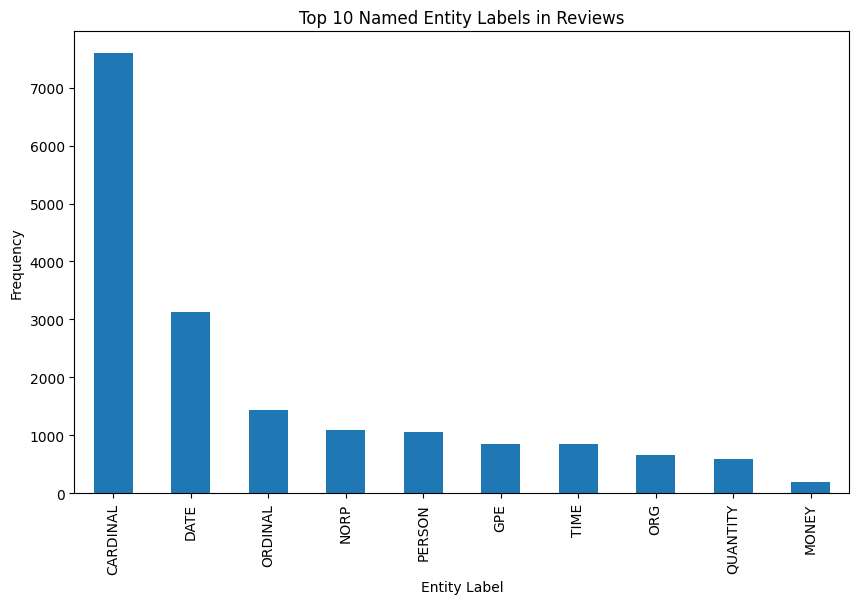

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

all_entities = [label for entities in df_processed['named_entities'] for (_, label) in entities]


entity_freq = Counter(all_entities)

entity_freq_series = pd.Series(entity_freq).sort_values(ascending=False)

# Plot top 10 entity labels
plt.figure(figsize=(10,6))
entity_freq_series.head(10).plot(kind='bar')
plt.title('Top 10 Named Entity Labels in Reviews')
plt.xlabel('Entity Label')
plt.ylabel('Frequency')
plt.show()


In [11]:
from collections import defaultdict

# Create a dictionary to store entities by label
entities_by_label = defaultdict(list)

# Loop over all named entities in the dataset
for entities in df_processed['named_entities']:
    for text, label in entities:
        entities_by_label[label].append(text)

# For example, get unique products mentioned (PRODUCT), persons (PERSON), orgs (ORG)
unique_products = set(entities_by_label.get('PRODUCT', []))
unique_persons = set(entities_by_label.get('PERSON', []))
unique_orgs = set(entities_by_label.get('ORG', []))
unique_locations = set(entities_by_label.get('GPE', []))

print(f"Number of unique products mentioned: {len(unique_products)}")
print(f"Sample products: {list(unique_products)[:10]}")

print(f"\nNumber of unique persons mentioned: {len(unique_persons)}")
print(f"Sample persons: {list(unique_persons)[:10]}")

print(f"\nNumber of unique organizations mentioned: {len(unique_orgs)}")
print(f"Sample organizations: {list(unique_orgs)[:10]}")

print(f"\nNumber of unique locations mentioned: {len(unique_locations)}")
print(f"Sample locations: {list(unique_locations)[:10]}")


Number of unique products mentioned: 36
Sample products: ['diet coke', 'guinness', 'sm58', 'sodas', 'hrefhttpwwwamazoncomgpproductb003vxhgdmwolfgang', 'a1', '208f', 'sm57', '3box', 'martin']

Number of unique persons mentioned: 615
Sample persons: ['joe', 'mike', 'bonsaiboy', 'br chia seeds', 'math7', 'amazonhealthy hearty', 'garlic packaging', 'david buffalo', 'hrefhttpwwwamazoncomgpproductb000gevgxagoccia black truffle', 'innova max']

Number of unique organizations mentioned: 318
Sample organizations: ['the earl grey', 'house donut shop', 'maple  brown sugar', 'houston texas', 'eat basamati brown', 'san marzano tomatoes', 'wolfgang', 'hrefhttpwwwamazoncomgpproductb000fvum02lundberg', 'justin', 'pioneer']

Number of unique locations mentioned: 245
Sample locations: ['annabelle', 'san jose', 'hamburg', 'cheddar', 'taco', 'pennsylvania', 'louisiana', 'mgbr', 'woudl', 'creami']
